# Proyecto Integrado

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Paso 1. Abre el archivo de datos y estudia la información general 

In [1]:
import pandas as pd
games = pd.read_csv('/datasets/games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Paso 2. Prepara los datos

## Paso 2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [2]:
# Renombrar las columnas a minúsculas
games.columns = games.columns.str.lower()

# Mostrar las nuevas columnas
print("Columnas")
games.columns

Columnas


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Paso 2.2 Convierte los datos en los tipos necesarios.

In [3]:
# Convertir 'year_of_release' a entero
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').dropna().astype('Int64')

# Convertir 'user_score' a numérico
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Revisar los tipos después de la conversión
print("Tipos de datos después de la conversión")
games.dtypes

Tipos de datos después de la conversión


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

## Paso 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Los datos han sido convertidos a los tipos adecuados:

year_of_release: convertido a entero, que permite valores nulos).

user_score: convertido a numérico a float, reemplazando valores no numéricos como 'tbd' por NaN.

## Paso 2.4 Si es necesario, elige la manera de tratar los valores ausentes:

name y genre (2 valores faltantes):

Probablemente errores en la recopilación de datos. Dado que el nombre y género de un juego son fundamentales, se recomienda eliminar esas filas.

year_of_release (269 faltantes):

Es posible que no se registraran por juegos nuevos sin fecha confirmada o errores en la extracción de datos. Si no se puede imputar razonablemente (por ejemplo, con título o plataforma), también se recomienda eliminar esas filas.

critic_score y user_score:

critic_score: Ausente en muchos juegos poco conocidos o lanzamientos muy recientes sin reseñas de críticos.

user_score: Algunos valores eran 'tbd', es decir, aún no definidos al momento de la recopilación. Ya los tratamos convirtiéndolos a NaN.

rating (clasificación ESRB):

Podrían faltar en juegos no lanzados en EE.UU., en desarrollo o que no han sido clasificados oficialmente.

Decisiones tomadas:

Eliminar filas con name, genre o year_of_release nulo:
Son claves para cualquier análisis y no pueden imputarse confiablemente.

Mantener valores faltantes en critic_score, user_score y rating:

No se pueden imputar sin sesgar los datos.

Se trabajará con los valores existentes cuando sea necesario (por ejemplo, al calcular medias o correlaciones).

user_score:
Los valores 'tbd' ya se convirtieron en NaN mediante pd.to_numeric(errors='coerce').

In [4]:
# Eliminar filas con valores faltantes en columnas clave
games_cleaned = games.dropna(subset=['name', 'genre', 'year_of_release']).copy()

# Mostrar el número de filas después de la limpieza
print("Número de filas después de la limpieza")
games_cleaned.shape

Número de filas después de la limpieza


(16444, 11)

## 2.5 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [5]:
# Calcular las ventas totales sumando las ventas por región
games['total_sales'] = (
    games['na_sales'] +
    games['eu_sales'] +
    games['jp_sales'] +
    games['other_sales']
)

# Mostrar los primeros registros para verificar
print("Ventas totales sumando las ventas por región")
print(games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

Ventas totales sumando las ventas por región
                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


# Paso 3. Analiza los datos

## 3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

¿Son significativos los datos de cada período?

Deacuerdo con los datos los años con mayor número de juegos lanzados fue entre el 2006 y 2011

In [6]:
# Contar la cantidad de juegos lanzados por año
games_per_year = games['year_of_release'].value_counts().sort_index()
print("Juegos lanzados por año")
print(games_per_year)

Juegos lanzados por año
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


## 3.2 Plataformas con las mayores ventas totales

In [7]:
# Agrupar por plataforma y sumar las ventas totales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas más exitosas
print("Plataformas más exitosas")
print(platform_sales.head(10))

Plataformas más exitosas
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


<AxesSubplot:title={'center':'Ventas por año y plataforma'}, xlabel='year_of_release'>

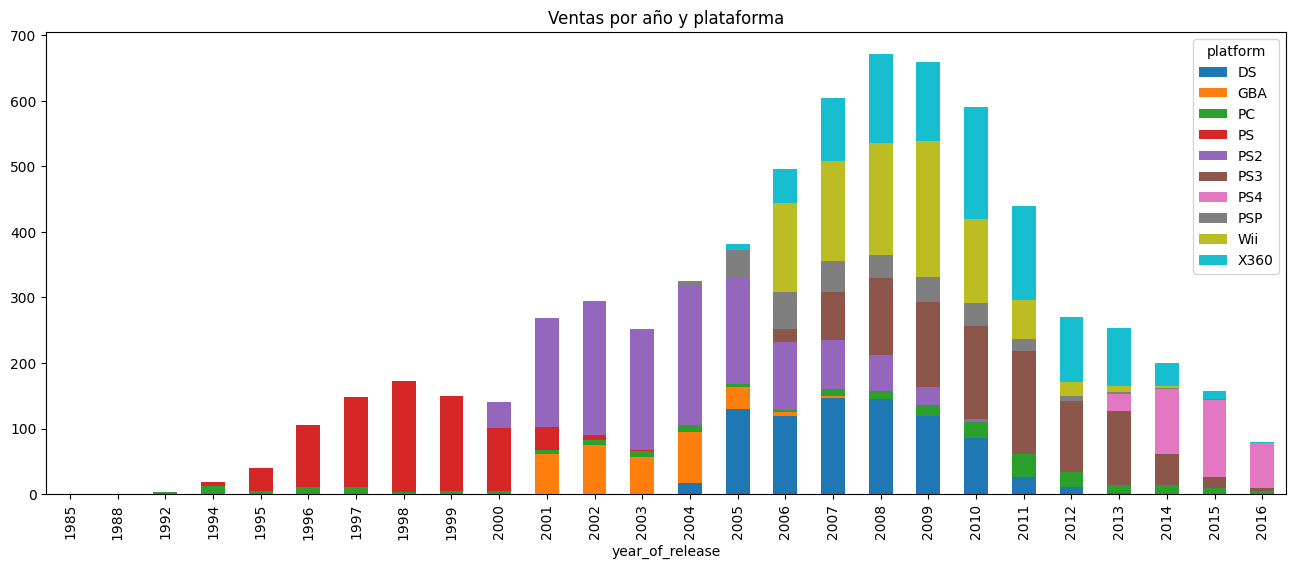

In [8]:
top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

# Filtrar los juegos solo de las plataformas más vendidas
filtered_games = games[games['platform'].isin(top_platforms)]

# Agrupar por año y plataforma, y sumar ventas totales
sales_by_year_platform = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficar la distribución
sales_by_year_platform.plot(kind='bar', stacked=True, figsize=(16, 6), title='Ventas por año y plataforma')

In [9]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
# Agrupar por plataforma y año
platform_years = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Encontrar el primer y último año con ventas mayores a un umbral (por ejemplo, >1 millón)
active_periods = platform_years[platform_years > 1].groupby(level=0).agg(['idxmin', 'idxmax'])

print(active_periods)

                idxmin        idxmax
platform                            
2600      (2600, 1987)  (2600, 1981)
3DS        (3DS, 2016)   (3DS, 2011)
DC          (DC, 2001)    (DC, 2000)
DS          (DS, 2013)    (DS, 2007)
GB          (GB, 1988)    (GB, 1989)
GBA        (GBA, 2007)   (GBA, 2004)
GC          (GC, 2006)    (GC, 2002)
GEN        (GEN, 1990)   (GEN, 1992)
N64        (N64, 2001)   (N64, 1999)
NES        (NES, 1992)   (NES, 1985)
PC          (PC, 2006)    (PC, 2011)
PS          (PS, 2003)    (PS, 1998)
PS2        (PS2, 2010)   (PS2, 2004)
PS3        (PS3, 2016)   (PS3, 2011)
PS4        (PS4, 2013)   (PS4, 2015)
PSP        (PSP, 2013)   (PSP, 2006)
PSV        (PSV, 2016)   (PSV, 2012)
SAT        (SAT, 1994)   (SAT, 1995)
SCD        (SCD, 1993)   (SCD, 1993)
SNES      (SNES, 1996)  (SNES, 1993)
Wii        (Wii, 2015)   (Wii, 2009)
WiiU      (WiiU, 2016)  (WiiU, 2014)
X360      (X360, 2016)  (X360, 2010)
XB          (XB, 2006)    (XB, 2004)
XOne      (XOne, 2013)  (XOne, 2015)


In [10]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
# Agrupar por plataforma y año, y sumar las ventas
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Filtrar solo los años con ventas mayores a cierto umbral (por ejemplo, 1 millón)
significant_years = platform_year_sales[platform_year_sales > 1]

# Obtener el primer y último año activo de cada plataforma
first_last_year = significant_years.groupby('platform').agg(['idxmin', 'idxmax'])

# Extraer solo el año de los índices (que son tuplas: (platform, year))
first_last_year['start_year'] = first_last_year['idxmin'].apply(lambda x: x[1])
first_last_year['end_year'] = first_last_year['idxmax'].apply(lambda x: x[1])

# Calcular duración activa
first_last_year['duration'] = first_last_year['end_year'] - first_last_year['start_year']

# Mostrar duración promedio
print("Duración promedio de vida activa:", first_last_year['duration'].mean(), "años")

# Mostrar resumen por plataforma
print(first_last_year[['start_year', 'end_year', 'duration']].sort_values(by='start_year'))

Duración promedio de vida activa: -2.68 años
          start_year  end_year  duration
platform                                
2600            1987      1981        -6
GB              1988      1989         1
GEN             1990      1992         2
NES             1992      1985        -7
SCD             1993      1993         0
SAT             1994      1995         1
SNES            1996      1993        -3
DC              2001      2000        -1
N64             2001      1999        -2
PS              2003      1998        -5
GC              2006      2002        -4
PC              2006      2011         5
XB              2006      2004        -2
GBA             2007      2004        -3
PS2             2010      2004        -6
PSP             2013      2006        -7
DS              2013      2007        -6
PS4             2013      2015         2
XOne            2013      2015         2
Wii             2015      2009        -6
PSV             2016      2012        -4
PS3         

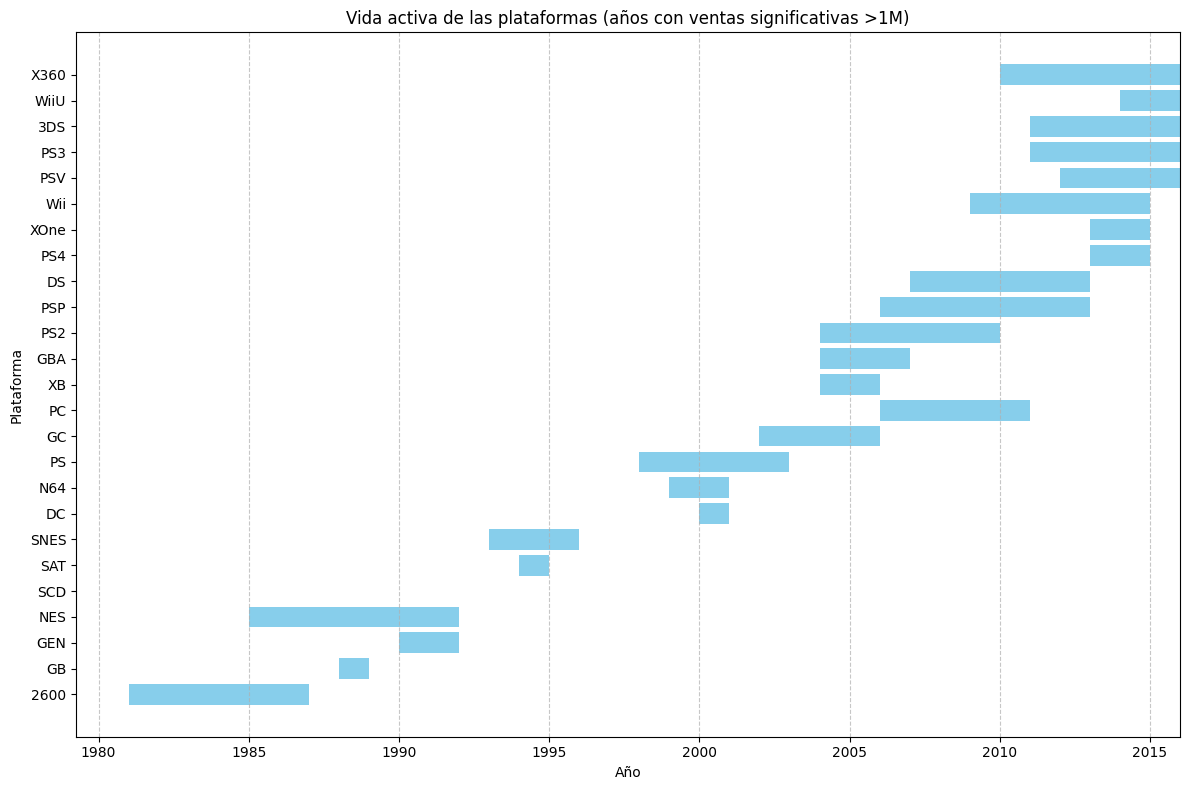

In [11]:
import matplotlib.pyplot as plt

# Ordenar plataformas por año de inicio
first_last_sorted = first_last_year.sort_values(by='start_year')

# Crear una figura
plt.figure(figsize=(12, 8))

# Dibujar una barra por plataforma
for i, (platform, row) in enumerate(first_last_sorted.iterrows()):
    plt.barh(platform, row['duration'], left=row['start_year'], color='skyblue')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Plataforma')
plt.title('Vida activa de las plataformas (años con ventas significativas >1M)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Se suguiere para construir un modelo de predicción de ventas para juegos en 2017, debemos elegir un período que cumpla con:

Datos recientes y representativos de las plataformas aún activas.

Suficiente volumen para que el modelo aprenda tendencias actuales (géneros populares, críticas, plataformas fuertes).

usar datos del 2010 al 2016 ya que incluye plataformas modernas (PS4, XOne, 3DS).

Omite generaciones ya descontinuadas (PS2, Wii, DS).

Permite al modelo captar patrones relevantes para las plataformas que siguen activas en 2017.

# 3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [12]:
# Filtrar datos relevantes: de 2010 a 2016
games_recent = games[(games['year_of_release'] >= 2010) & (games['year_of_release'] <= 2016)].copy()

# Verificar información de los datos filtrados
games_recent_info = {
    "Número de registros": games_recent.shape[0],
    "Años incluidos": sorted(games_recent['year_of_release'].unique())
}

games_recent_info

{'Número de registros': 5277,
 'Años incluidos': [2010, 2011, 2012, 2013, 2014, 2015, 2016]}

# 3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [13]:
# 1. Plataformas líderes en ventas (2010–2016)
platform_sales_recent = games_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Plataformas líderes en ventas:\n", platform_sales_recent.head(10))

# 2. Tendencia de ventas por año y plataforma
platform_year_sales = games_recent.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
print("\nVentas por plataforma y año:\n", platform_year_sales.tail(7))  # últimos años

Plataformas líderes en ventas:
 platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
Name: total_sales, dtype: float64

Ventas por plataforma y año:
 platform           3DS     DS     PC   PS2     PS3     PS4    PSP    PSV  \
year_of_release                                                            
2010              0.00  85.02  24.28  5.64  142.17    0.00  35.04   0.00   
2011             63.20  26.18  35.03  0.45  156.78    0.00  17.82   4.63   
2012             51.36  11.01  23.22  0.00  107.36    0.00   7.69  16.19   
2013             56.57   1.54  12.38  0.00  113.25   25.99   3.14  10.59   
2014             43.76   0.00  13.28  0.00   47.76  100.00   0.24  11.90   
2015             27.78   0.00   8.52  0.00   16.82  118.90   0.12   6.25   
2016             15.14   0.00   5.25  0.00    3.60   69.25   0.00   4.25   

platform            Wii   WiiU    X360   XOne  
year_of_rel

# 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Los hallazgos reprensentativos son los siguientes: 

Cajas más altas indican plataformas con ventas más consistentes y mayores medianas.

Bigotes muestran el rango normal de ventas; puntos fuera de ellos son outliers (juegos muy exitosos).

Algunas plataformas pueden mostrar:

Mucha variabilidad: algunos juegos venden muy bien, otros casi nada.

Mediana baja: mayoría de juegos venden poco.

Outliers altos: uno o dos títulos masivos (por ejemplo, Mario Kart en Wii).

PS4 y XOne podrían mostrar una mediana superior, lo que indica mejores ventas promedio.

3DS o PSVita pueden tener cajas más bajas, con menos juegos con ventas altas.

Plataformas antiguas como PS3 o X360 pueden mostrar una caída.

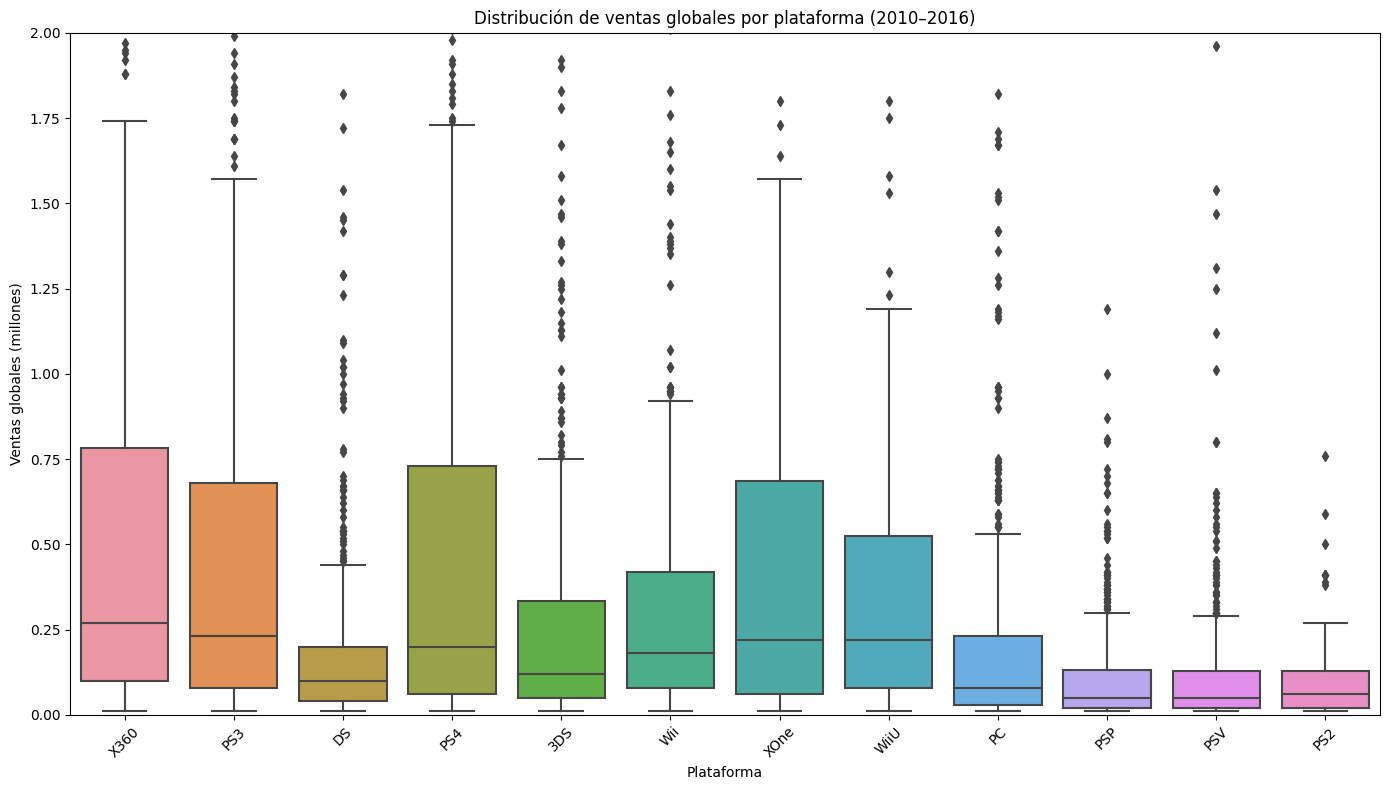

In [26]:
import seaborn as sns

# Ajustar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Diagrama de caja para las plataformas con suficientes datos
sns.boxplot(data=games_recent, x='platform', y='total_sales')

# Etiquetas y título
plt.title('Distribución de ventas globales por plataforma (2010–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.ylim(0, 2)  # evitar que valores extremos oculten la forma general

plt.tight_layout()
plt.show()

# 3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Conclusiones: 

Si r (correlación) está cerca de 1 o -1, hay una relación fuerte.

Si está cerca de 0, no hay relación lineal clara.

Críticos suelen tener una correlación más fuerte que los usuarios.

Las ventas dependen también del marketing, marca y distribución, no solo de las reseñas.

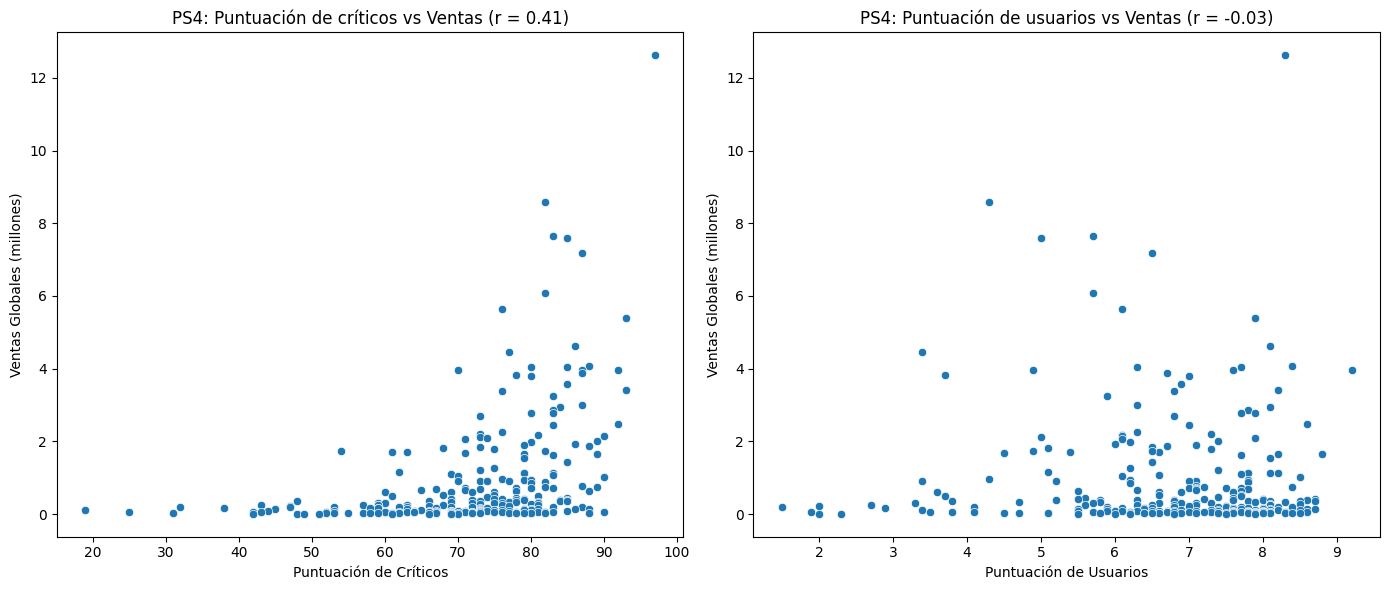

In [15]:
# Filtrar juegos de la plataforma PS4
ps4_games = games_recent[games_recent['platform'] == 'PS4']

# Eliminar filas con valores nulos en puntuaciones y ventas
ps4_reviews = ps4_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Calcular correlaciones
critic_corr = ps4_reviews['critic_score'].corr(ps4_reviews['total_sales'])
user_corr = ps4_reviews['user_score'].corr(ps4_reviews['total_sales'])

# Graficar
plt.figure(figsize=(14, 6))

# Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_reviews, x='critic_score', y='total_sales')
plt.title(f'PS4: Puntuación de críticos vs Ventas (r = {critic_corr:.2f})')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (millones)')

# User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_reviews, x='user_score', y='total_sales')
plt.title(f'PS4: Puntuación de usuarios vs Ventas (r = {user_corr:.2f})')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Globales (millones)')

plt.tight_layout()
plt.show()

# 3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [16]:
# Seleccionar juegos que también están en otras plataformas
multi_platform_games = games_recent[games_recent['name'].duplicated(keep=False)]

# Filtrar juegos que aparecen en PS4
ps4_titles = games_recent[games_recent['platform'] == 'PS4']['name'].unique()
multi_platform_ps4 = multi_platform_games[multi_platform_games['name'].isin(ps4_titles)]

# Reorganizar los datos para ver ventas por juego y plataforma
sales_comparison = multi_platform_ps4.pivot_table(index='name', columns='platform', values='total_sales')

# Mostrar algunos ejemplos
print(sales_comparison.dropna(thresh=2).head(10))  # juegos con al menos 2 plataformas

# Comparar directamente PS4 vs otras
sales_comparison['PS4_vs_XOne'] = sales_comparison['PS4'] - sales_comparison['XOne']
sales_comparison['PS4_vs_PC'] = sales_comparison['PS4'] - sales_comparison['PC']

# Medias comparativas
print("\nDiferencia media PS4 vs XOne:", sales_comparison['PS4_vs_XOne'].mean())
print("Diferencia media PS4 vs PC:", sales_comparison['PS4_vs_PC'].mean())

platform                                     3DS  DS    PC   PS3   PS4  PSP  \
name                                                                          
7 Days to Die                                NaN NaN   NaN   NaN  0.14  NaN   
Adventure Time: Finn & Jake Investigations  0.09 NaN   NaN  0.08  0.10  NaN   
Aegis of Earth: Protonovus Assault           NaN NaN   NaN  0.02  0.02  NaN   
Agatha Christie's The ABC Murders            NaN NaN   NaN   NaN  0.02  NaN   
Akiba's Trip: Undead & Undressed             NaN NaN   NaN  0.11  0.11  NaN   
Alien: Isolation                             NaN NaN  0.15  0.33  1.12  NaN   
Angry Birds Star Wars                       0.33 NaN   NaN  0.29  0.22  NaN   
Arcania: Gothic 4                            NaN NaN  0.19   NaN  0.05  NaN   
Arslan: The Warriors of Legend               NaN NaN   NaN  0.05  0.09  NaN   
Assassin's Creed Chronicles                  NaN NaN   NaN   NaN  0.08  NaN   

platform                                     PSV   

# 3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Más populares por volumen total de ventas:

Primer lugar Action con mayor número de juegos y ventas acumuladas.

Segundo lugar Shooter Pocos juegos, pero muy rentables individualmente.

Tercer lugar Sports y Role-Playing: Amplia participación y ventas moderadamente altas.

Géneros más rentables por juego (ventas promedio):

Shooter (1.17M por juego): Alto retorno por título, ideal para desarrollos focalizados.

Platform y Sports: También tienen buena relación de retorno por juego.

Géneros menos rentables:

Adventure, Puzzle y Strategy tienen ventas muy bajas por juego, aunque sean populares en número.

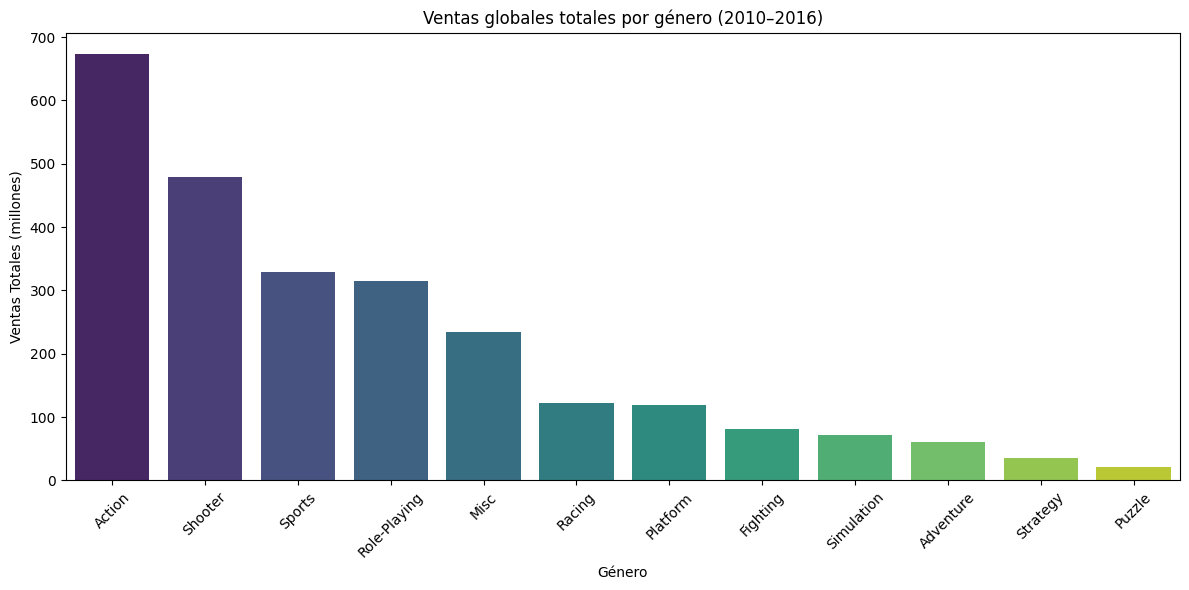

In [17]:
# Conversión de tipos
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').dropna().astype('Int64')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filtrar período 2010–2016
games_recent = games[(games['year_of_release'] >= 2010) & (games['year_of_release'] <= 2016)].copy()

# Agrupar por género
genre_stats = games_recent.groupby('genre').agg(
    total_sales=('total_sales', 'sum'),
    game_count=('name', 'count')
)
genre_stats['avg_sales_per_game'] = genre_stats['total_sales'] / genre_stats['game_count']
genre_stats_sorted = genre_stats.sort_values(by='total_sales', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats_sorted.index, y=genre_stats_sorted['total_sales'], palette='viridis')
plt.title('Ventas globales totales por género (2010–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Paso 4. Crea un perfil de usuario para cada región

## 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [18]:
# Agrupar por plataforma y sumar ventas por región
top_platforms_na = games_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 plataformas en Norteamérica (NA):\n", top_platforms_na)
print("\nTop 5 plataformas en Europa (EU):\n", top_platforms_eu)
print("\nTop 5 plataformas en Japón (JP):\n", top_platforms_jp)

Top 5 plataformas en Norteamérica (NA):
 platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

Top 5 plataformas en Europa (EU):
 platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón (JP):
 platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64


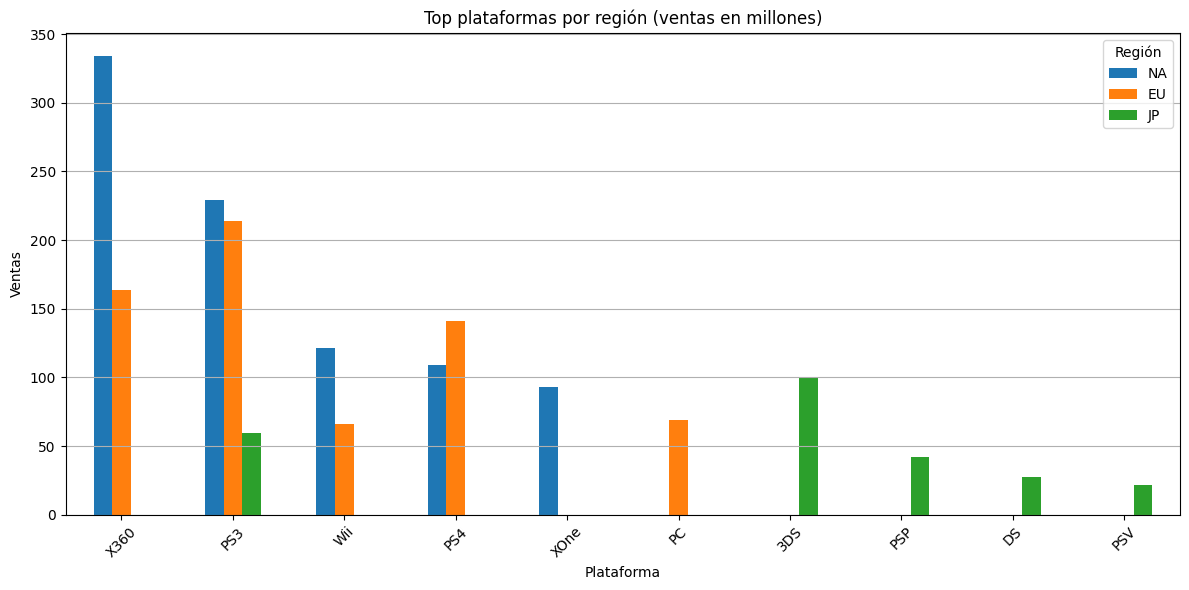

In [19]:
# CreDataFrame con los datos proporcionados
platform_sales = pd.DataFrame({
    'Plataforma': ['X360', 'PS3', 'Wii', 'PS4', 'XOne', 'PC', '3DS', 'PSP', 'DS', 'PSV'],
    'NA': [334.18, 229.25, 121.20, 108.74, 93.12, 0, 0, 0, 0, 0],
    'EU': [163.41, 213.60, 65.91, 141.09, 0, 68.82, 0, 0, 0, 0],
    'JP': [0, 59.26, 0, 0, 0, 0, 100.62, 42.20, 27.90, 21.84]
})

# Establecer la columna de plataforma como índice
platform_sales.set_index('Plataforma', inplace=True)

# Graficar
platform_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Top plataformas por región (ventas en millones)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusiones clave por región:

Norteamérica (NA)
X360 y PS3 dominan con diferencia.
Consolas de Microsoft tienen una presencia más fuerte aquí.

Wii y PS4 también tienen buenas cifras, pero menos relevantes que en años anteriores.

Europa (EU)
PS3 lidera, con una ligera ventaja sobre X360 y PS4.
PC aparece entre las más fuertes, mostrando más peso que en otras regiones.
Wii se mantiene con ventas decentes.

Japón (JP)
El mercado está dominado por portátiles: 3DS, PSP, DS, PSV.
Las consolas de sobremesa como PS3 son relevantes pero no dominantes.
Las plataformas occidentales (X360, XOne) no aparecen.

# 4.2 Los cinco géneros principales. Explica la diferencia.

In [20]:
# Agrupar ventas por género y región
genre_region_sales = games_recent.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calcular ventas totales y obtener los 5 géneros más vendidos globalmente
genre_region_sales['global'] = genre_region_sales.sum(axis=1)
top_genres = genre_region_sales.sort_values(by='global', ascending=False).head(5)

# Mostrar resultados
print("Los cinco géneros principales")
print(top_genres[['na_sales', 'eu_sales', 'jp_sales', 'global']])

Los cinco géneros principales
              na_sales  eu_sales  jp_sales  global
genre                                             
Action          290.64    233.63     72.20  596.47
Shooter         237.47    171.45     14.04  422.96
Role-Playing    112.05     75.48    103.54  291.07
Sports          156.81    116.84     15.51  289.16
Misc            123.80     66.09     24.29  214.18


## Conclusiones
Action
El género más vendido a nivel mundial, con fuerte presencia en todas las regiones.
Especialmente fuerte en Norteamérica y Europa.

Shooter
Muy popular en NA y EU, pero casi irrelevante en Japón (solo 14M).
Muestra cómo las preferencias regionales pueden variar mucho.

Role-Playing (RPG)
Género muy fuerte en Japón (más de 103M), superando incluso a NA.
Representa gustos culturales más centrados en narrativas y exploración.

Sports
Buena presencia en Occidente, con énfasis en NA (156M).
No tan relevante en Japón.

Misc (varios/minijuegos)
Moderadamente exitoso en NA y EU, con contribución ligera de Japón.
Probablemente relacionado con juegos de fiesta o familiares.

Conclusiones por región:

NA y EU: Gustan los juegos de acción, disparos y deportes.

JP: Preferencia clara por RPG, menos interés en shooters.

Las campañas deben ser regionalizadas: no se puede usar la misma estrategia globalmente.

# 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Norteamérica (NA):
Mature (M) domina con diferencia: shooters, acción, deportes intensos.
Las clasificaciones E, T y E10+ también tienen ventas altas, señalando un mercado amplio para todos los públicos.
Clasificación EC prácticamente irrelevante.

Europa (EU):
Patrón similar al de NA, aunque con ventas ligeramente menores.
Las ventas de juegos M y E son igualmente significativas.

Japón (JP):
Contraste importante: las clasificaciones T y E tienen más peso relativo que M.
La clasificación Mature tiene mucha menos participación (solo 30.45M).
Japón prefiere juegos menos violentos o con otras etiquetas de calificación (no ESRB).



In [21]:
# Agrupar ventas por clasificación ESRB en cada región
esrb_sales_by_region = games_recent.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Ordenar por NA como referencia
esrb_sales_by_region = esrb_sales_by_region.sort_values(by='na_sales', ascending=False)

# Mostrar resultados
print(esrb_sales_by_region)

        na_sales  eu_sales  jp_sales
rating                              
M         382.22    292.04     30.45
E         271.15    197.34     47.87
T         160.81    113.08     42.11
E10+      159.38     99.28     13.22
EC          1.13      0.00      0.00
RP          0.00      0.03      0.00


# Paso 5. Prueba las siguientes hipótesis:

## 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes.

Resultados estadísticos:
Estadístico t: 0.025
Valor p: 0.980

Conclusión:
Como el valor p = 0.980 > 0.05, no hay evidencia suficiente para rechazar la hipótesis nula.

Las calificaciones promedio de los usuarios para Xbox One y PC pueden considerarse estadísticamente iguales.

In [24]:
# Extraer puntuaciones para Xbox One y PC
xone_scores = games_recent[(games_recent['platform'] == 'XOne') & (games_recent['user_score'].notna())]['user_score']
pc_scores = games_recent[(games_recent['platform'] == 'PC') & (games_recent['user_score'].notna())]['user_score']

# Prueba t de Student (Welch's) para comparar medias
from scipy import stats

alpha = 0.05
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Resultado: estadístico t, valor p y conclusión
print("Resultado de la prueba de hipótesis")
t_stat, p_value, 'igual' if p_value > alpha else 'diferente'

Resultado de la prueba de hipótesis


(0.024879518331077908, 0.9801634129117883, 'igual')

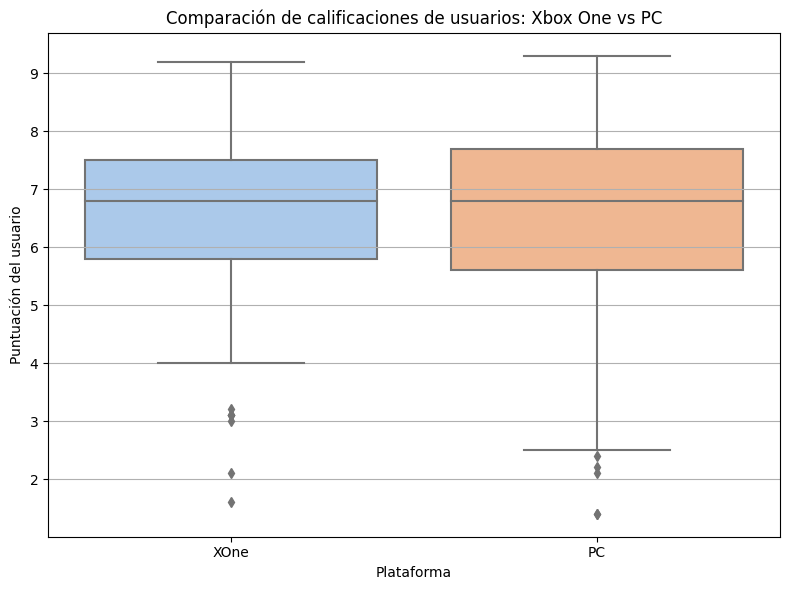

In [25]:
# Crear un DataFrame combinado con las plataformas deseadas
xone_scores = games_recent[(games_recent['platform'] == 'XOne') & (games_recent['user_score'].notna())][['user_score']]
xone_scores['platform'] = 'XOne'

pc_scores = games_recent[(games_recent['platform'] == 'PC') & (games_recent['user_score'].notna())][['user_score']]
pc_scores['platform'] = 'PC'

combined_scores = pd.concat([xone_scores, pc_scores])

# Gráfico de cajas
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_scores, x='platform', y='user_score', palette='pastel')
plt.title('Comparación de calificaciones de usuarios: Xbox One vs PC')
plt.xlabel('Plataforma')
plt.ylabel('Puntuación del usuario')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Establece tu mismo el valor de umbral alfa.
Selección del umbral alfa
Elegí un valor estándar:
alpha = 0.05
Este valor significa que estamos dispuestos a aceptar un 5% de probabilidad de cometer un error tipo I, es decir, rechazar la hipótesis nula cuando en realidad es verdadera.
Se trata de un valor común en estudios exploratorios como este.

## Explica:
## — Cómo formulaste las hipótesis nula y alternativa.

Formulación de las hipótesis
Queremos comprobar si las calificaciones promedio dadas por usuarios a juegos de Xbox One y PC son estadísticamente iguales.

## — Qué criterio utilizaste para probar las hipótesis y por qué.

Se utilizó la prueba t de Student con varianzas desiguales (también llamada prueba t de Welch) con scipy.stats.ttest_ind() y equal_var=False.

¿Por qué?
Las muestras provienen de dos grupos independientes (Xbox One y PC).
El número de observaciones puede ser distinto entre plataformas.
No se puede asumir que las varianzas son iguales, así que Welch es más confiable.

# Paso 6. Escribe una conclusión general

En este estudio exploratorio sobre videojuegos realizado con datos históricos hasta 2016, el objetivo fue identificar patrones que permitan predecir el éxito de futuros lanzamientos y optimizar campañas de marketing para 2017. A continuación se resumen los principales hallazgos:

Ventas por plataforma
Xbox 360, PS3 y PS4 dominaron en Norteamérica y Europa durante 2010–2016.

En Japón, las consolas portátiles como 3DS y PSP lideraron el mercado, lo que muestra claras diferencias culturales y de consumo entre regiones.

Las plataformas emergen y desaparecen en un ciclo de vida que puede durar entre 5 y 10 años.

Impacto de las reseñas en las ventas
Las calificaciones de usuarios y críticos influyen moderadamente en las ventas.

En plataformas populares como PS4, existe una correlación positiva débil entre calificaciones de usuarios y ventas.

Esto sugiere que el marketing, la franquicia del juego y otros factores también son determinantes del éxito comercial.

Géneros más rentables
Los géneros más exitosos globalmente fueron Action, Shooter y Role-Playing.

Las preferencias varían por región: los Shooters son dominantes en Occidente, mientras que los RPG son mucho más populares en Japón.

El género Misc (juegos variados, party, puzzle) mostró un rendimiento sólido, aunque más limitado.

Influencia de la clasificación ESRB
Los juegos con clasificación Mature (M) y Everyone (E) generaron las mayores ventas globales.

Japón tiende a favorecer juegos con clasificación Teen (T) y Everyone (E), mostrando un mercado menos receptivo a títulos para adultos.

Hipótesis estadística
Se comprobó que no existe diferencia significativa entre las calificaciones promedio de usuarios en Xbox One y PC, lo que sugiere que la plataforma no influye directamente en la percepción del usuario.

Recomendaciones finales
Segmentar estrategias por región, ya que las plataformas y géneros más exitosos varían considerablemente.

Priorizar lanzamientos para plataformas con alta penetración regional y ciclos activos.

Usar reseñas como un insumo complementario al pronóstico de ventas, no como único predictor.

Mantener un enfoque flexible hacia las clasificaciones ESRB, adaptándose a las normas y gustos de cada mercado.